# **1. 캐글**
캐글(Kaggle)은 데이터 과학자와 머신러닝 엔지니어들이 학습, 협업, 경쟁할 수 있는 온라인 플랫폼입니다. 구글에 소속된 이 플랫폼은 다양한 데이터셋과 머신러닝 문제를 제공하며, 사용자들이 자신의 모델을 개발하고 성능을 경쟁적으로 평가받을 수 있는 경진대회도 열립니다. 초보자는 데이터를 다루는 실습을 하고, 경험 많은 전문가들은 포트폴리오를 확장하거나 상금을 받을 기회를 얻을 수 있습니다. 또한, 커뮤니티 포럼과 튜토리얼, 노트북 공유를 통해 지식을 공유하고 학습할 수 있는 환경을 제공합니다. 캐글은 데이터 분석과 머신러닝을 배우고 실제 문제에 적용해 보고 싶은 사람들에게 유용한 플랫폼입니다.



# **2. Online Retail**
* [주소](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)

In [1]:
from google.colab import files
files.upload()  # kaggle.json 업로드 창 표시
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [2]:
!kaggle datasets download mashlyn/online-retail-ii-uci

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
online-retail-ii-uci.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip -qq /content/online-retail-ii-uci.zip

replace online_retail_II.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import pandas as pd

In [5]:
retail = pd.read_csv('/content/online_retail_II.csv')
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


```
InvoiceNo: 주문 번호
StockCode: 상품 코드
Description: 상품 설명
Quantity: 주문 수량
InvoiceDate: 주문 날짜
Price: 상품 가격
Customer ID: 고객 아이디
Country: 고객 거주지역(국가)
```


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
retail.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [8]:
len(retail)

1067371

In [9]:
retail.isnull().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [10]:
retail.isnull().mean()

,0
Invoice,0.000000
StockCode,0.000000
Description,0.004105
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,0.227669
Country,0.000000


In [11]:
# 비회원/탈퇴 회원 제거
retail = retail[pd.notnull(retail['Customer ID'])]
len(retail)

824364

In [12]:
# 구입 수량이 0 이하인 데이터를 제거
print(len(retail[retail['Quantity']<= 0]))

retail = retail[retail['Quantity']>= 1]
print(len(retail))

18744
805620


In [13]:
# 구입 가격이 0 이하인 데이터를 제거
print(len(retail[retail['Price'] <= 0]))
retail = retail[retail['Price'] > 0]
print(len(retail))

71
805549


In [14]:
# 고객의 총 지출비용
# 총 지출비용 = 가격 * 수량
retail['CheckoutPrice'] = retail['Price'] * retail['Quantity']
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CheckoutPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [15]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Invoice        805549 non-null  object 
 1   StockCode      805549 non-null  object 
 2   Description    805549 non-null  object 
 3   Quantity       805549 non-null  int64  
 4   InvoiceDate    805549 non-null  object 
 5   Price          805549 non-null  float64
 6   Customer ID    805549 non-null  float64
 7   Country        805549 non-null  object 
 8   CheckoutPrice  805549 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 61.5+ MB


In [16]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Invoice        805549 non-null  object        
 1   StockCode      805549 non-null  object        
 2   Description    805549 non-null  object        
 3   Quantity       805549 non-null  int64         
 4   InvoiceDate    805549 non-null  datetime64[ns]
 5   Price          805549 non-null  float64       
 6   Customer ID    805549 non-null  float64       
 7   Country        805549 non-null  object        
 8   CheckoutPrice  805549 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 61.5+ MB


In [17]:
# 전체 매출
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

np.float64(17743429.178000003)

In [18]:
# 각 나라별 구매 횟수
retail['Country'].value_counts()

,count
Country,
United Kingdom,725250
Germany,16694
EIRE,15743
France,13812
Netherlands,5088
Spain,3719
Belgium,3068
Switzerland,3011
Portugal,2446


In [19]:
retail.groupby('Country')['Quantity'].count().sort_values(ascending=False)

,Quantity
Country,
United Kingdom,725250
Germany,16694
EIRE,15743
France,13812
Netherlands,5088
Spain,3719
Belgium,3068
Switzerland,3011
Portugal,2446


In [20]:
# 국가별 매출
rev_by_countries = retail.groupby('Country')['CheckoutPrice'].sum().sort_values()
rev_by_countries

,CheckoutPrice
Country,
Nigeria,1.403900e+02
Saudi Arabia,1.459200e+02
West Indies,5.364100e+02
Czech Republic,8.267400e+02
Korea,1.118510e+03
European Community,1.300250e+03
Bahrain,1.354370e+03
Brazil,1.411870e+03
Lebanon,1.693880e+03


In [21]:
import matplotlib.pyplot as plt

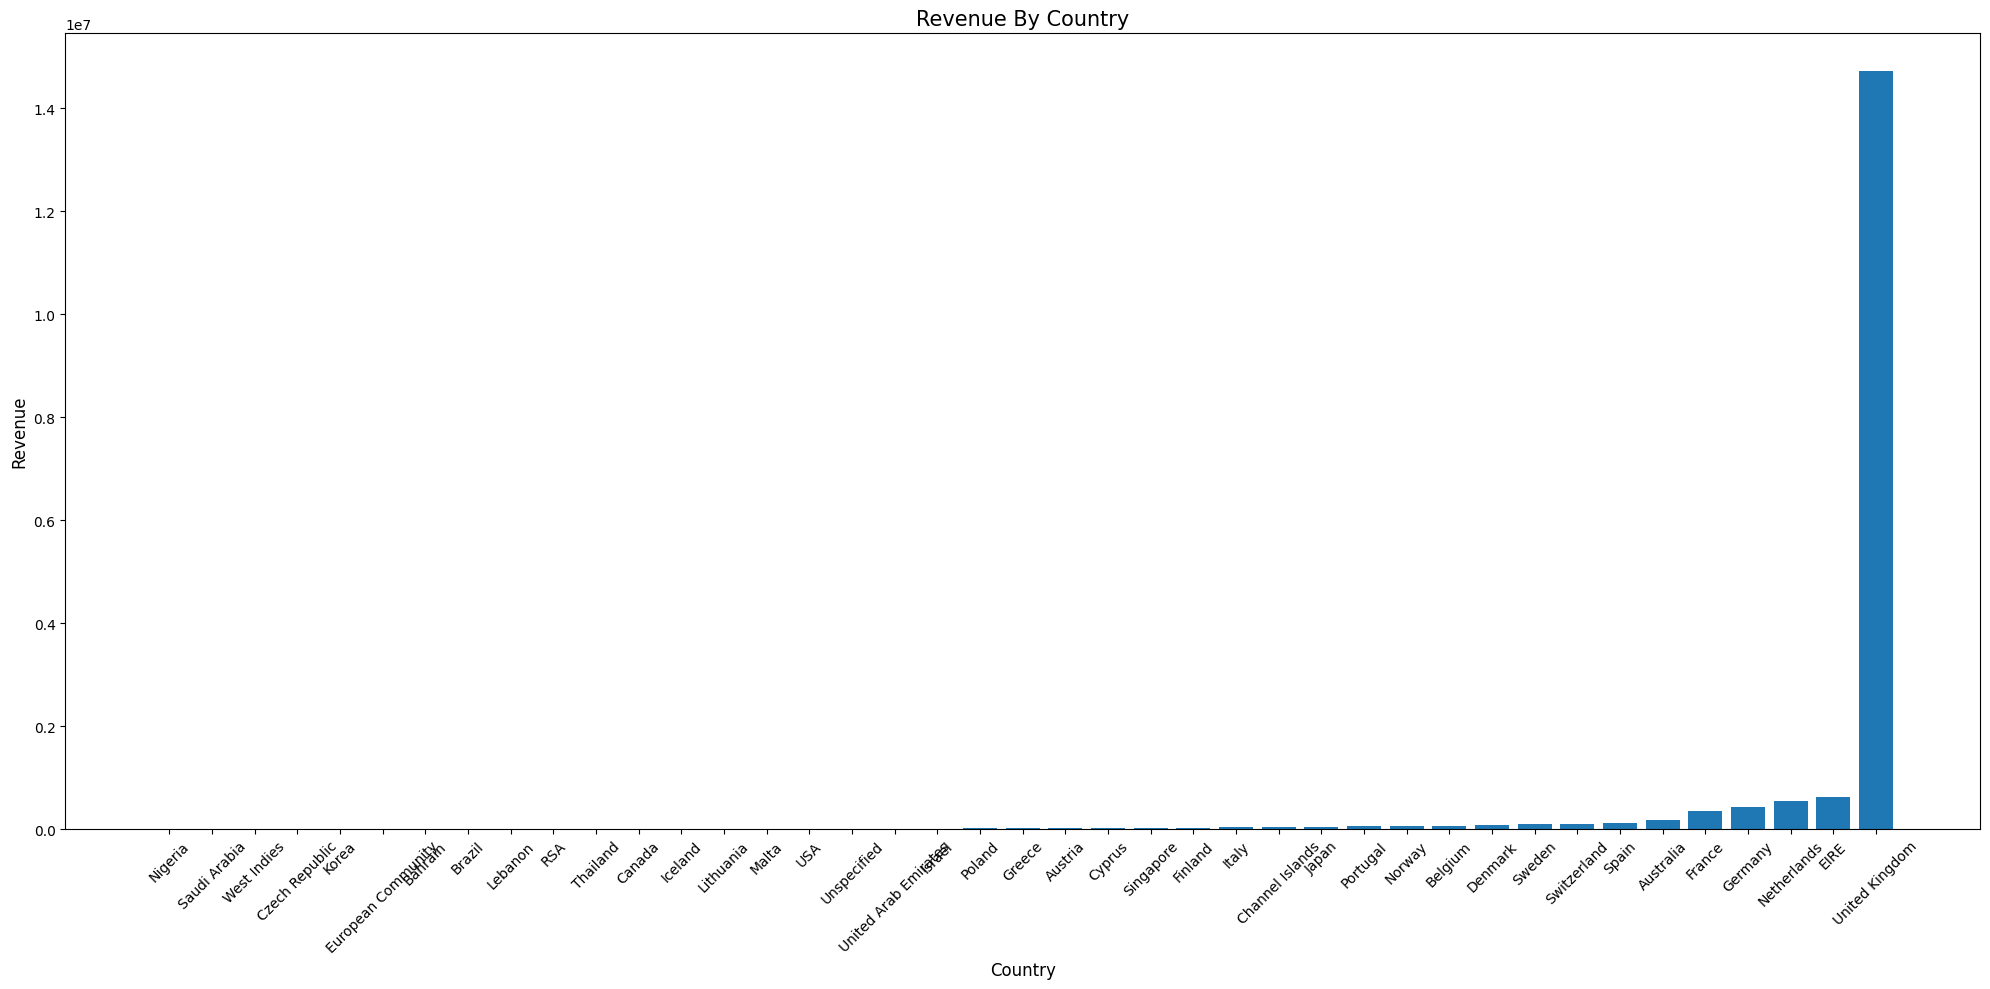

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(rev_by_countries.index, rev_by_countries.values)

ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)
ax.set_title('Revenue By Country', fontsize=15)

ax.set_xticks(range(len(rev_by_countries.index)))
ax.set_xticklabels(rev_by_countries.index, rotation=45)

plt.tight_layout()
plt.show()

In [23]:
rev_by_countries / total_revenue

,CheckoutPrice
Country,
Nigeria,0.000008
Saudi Arabia,0.000008
West Indies,0.000030
Czech Republic,0.000047
Korea,0.000063
European Community,0.000073
Bahrain,0.000076
Brazil,0.000080
Lebanon,0.000095


In [24]:
# 월별 매출 구하기
retail['InvoiceDate'].sort_values(ascending=False)

,InvoiceDate
1067370,2011-12-09 12:50:00
1067362,2011-12-09 12:50:00
1067355,2011-12-09 12:50:00
1067357,2011-12-09 12:50:00
1067358,2011-12-09 12:50:00
...,...
5,2009-12-01 07:45:00
4,2009-12-01 07:45:00
3,2009-12-01 07:45:00
2,2009-12-01 07:45:00


In [25]:
def extract_month(date): # 2009-12-01 07:45:00
    month = str(date.month) # 12, 1, 2, 3, ...
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month # 200912, 201001 ...

In [26]:
extract_month(pd.to_datetime('2009-12-01 07:45:00'))

'200912'

In [27]:
extract_month(pd.to_datetime('2009-01-01 07:45:00'))

'200901'

In [28]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month)['CheckoutPrice'].sum()
rev_by_month

,CheckoutPrice
InvoiceDate,
200912,686654.160
201001,557319.062
201002,506371.066
201003,699608.991
201004,594609.192
201005,599985.790
201006,639066.580
201007,591636.740
201008,604242.650


In [29]:
def plot_bar(df, xlabel, ylabel, title, figsize=(20, 10), fontsize=12, titlesize=15, rotation=45):
    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(df.index, df.values)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=titlesize)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.index, rotation=rotation, fontsize=fontsize)
    plt.tight_layout()
    plt.show()

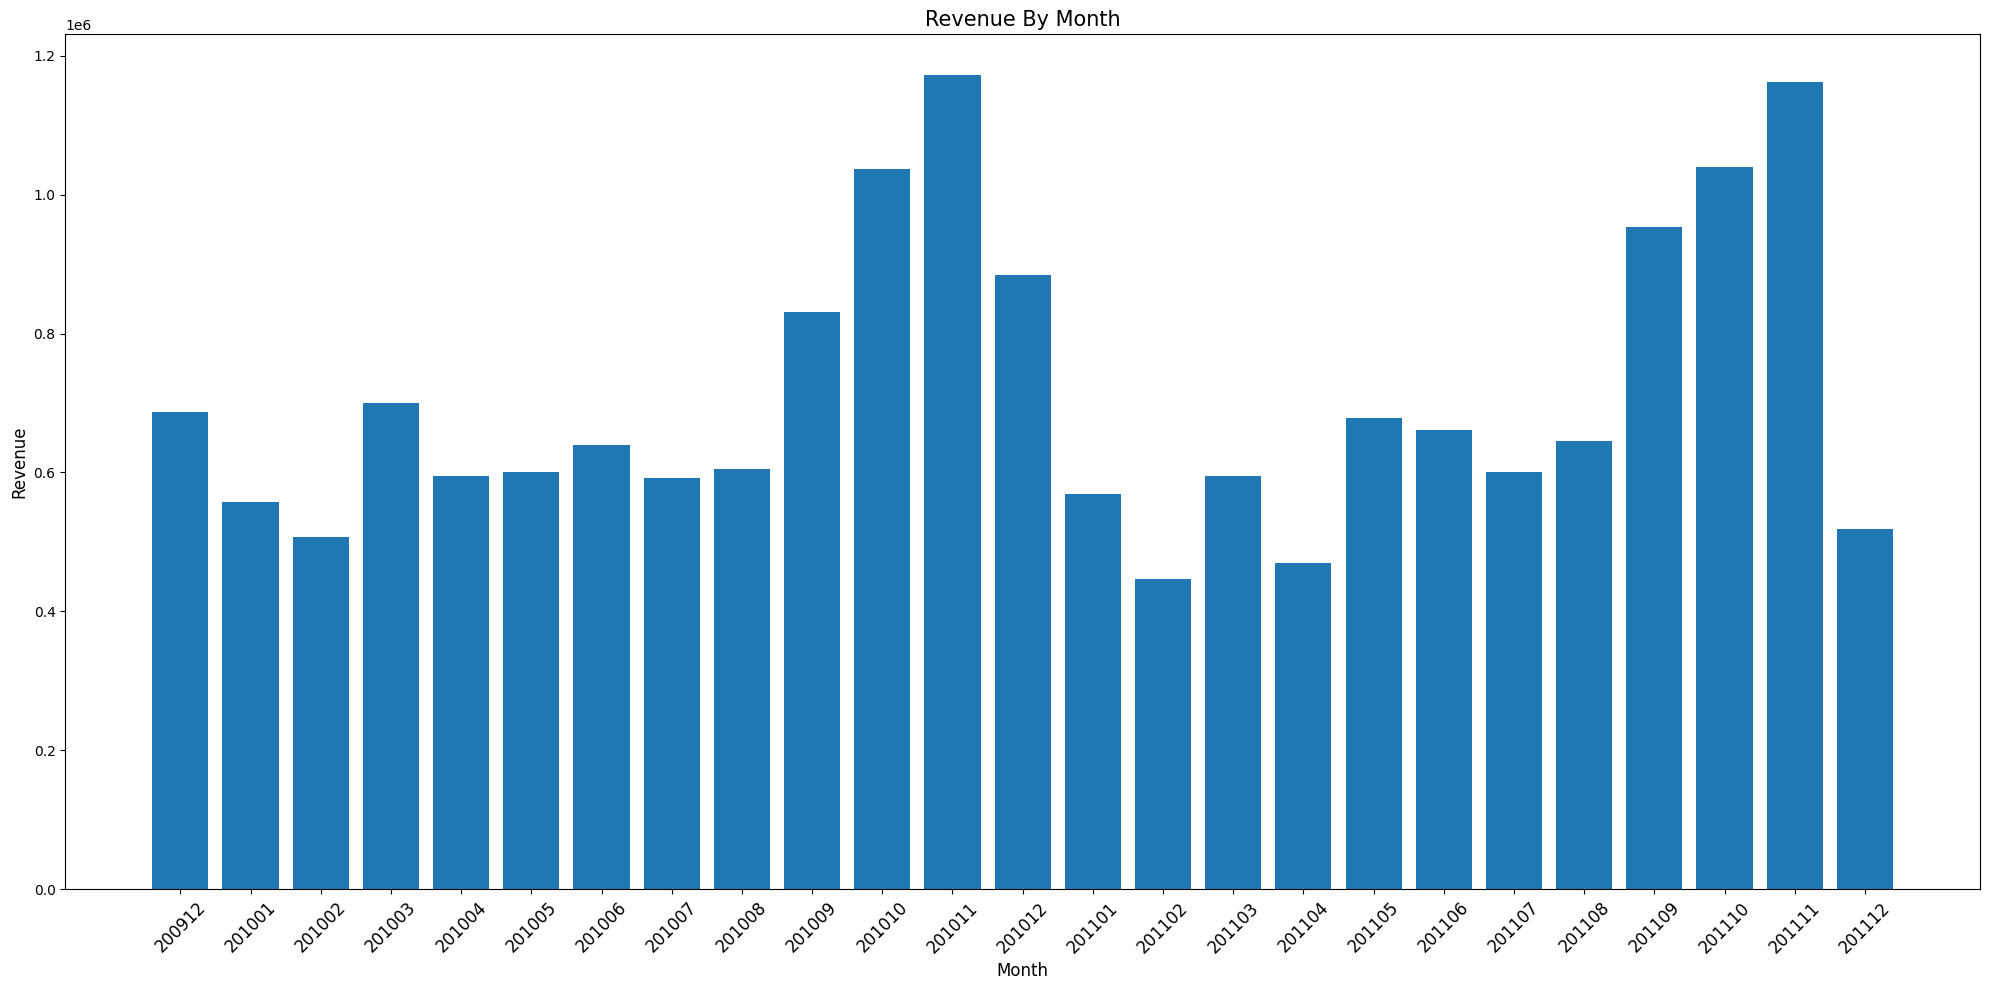

In [30]:
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue By Month')

In [31]:
# 요일별 매출 구하기
def extract_dow(date):
    return date.dayofweek

In [32]:
extract_dow(pd.to_datetime('2011-12-09 12:50:00')) # 0 : 월요일 ~ 6: 일요일

4

In [33]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date: date.dayofweek)['CheckoutPrice'].sum()
rev_by_dow

,CheckoutPrice
InvoiceDate,
0,2817407.806
1,3384678.832
2,3115619.693
3,3841082.962
4,2758423.493
5,9803.050
6,1816413.342


In [34]:
import numpy as np

In [36]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Web', 'THU', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
rev_by_dow

,CheckoutPrice
Mon,2817407.806
Tue,3384678.832
Web,3115619.693
THU,3841082.962
Fri,2758423.493
Sat,9803.050
Sun,1816413.342


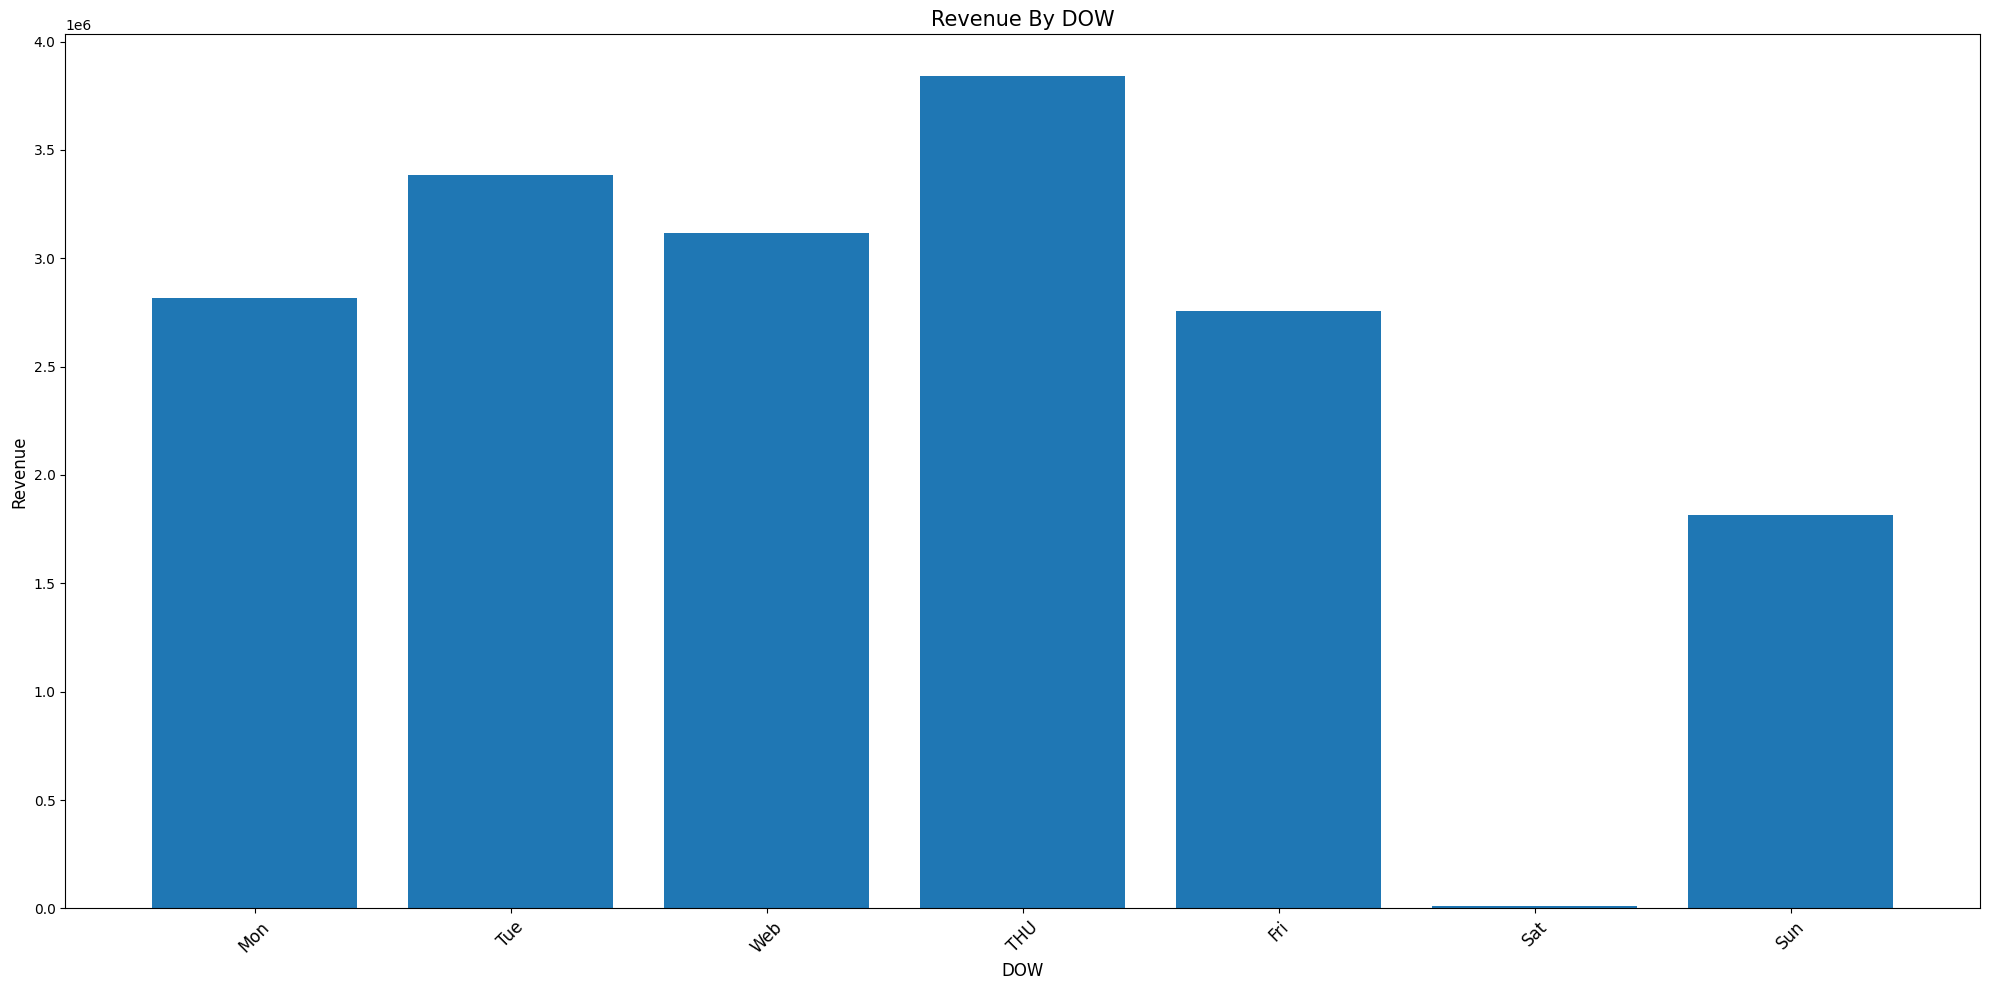

In [37]:
plot_bar(rev_by_dow, "DOW", "Revenue", "Revenue By DOW")

In [41]:
# 시간대별 매출 구하기
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date: date.hour)['CheckoutPrice'].sum()
rev_by_hour

,CheckoutPrice
InvoiceDate,
6,4.250
7,76212.570
8,528877.660
9,1509659.881
10,2360784.823
11,2271810.993
12,2750224.631
13,2401116.924
14,1995849.271


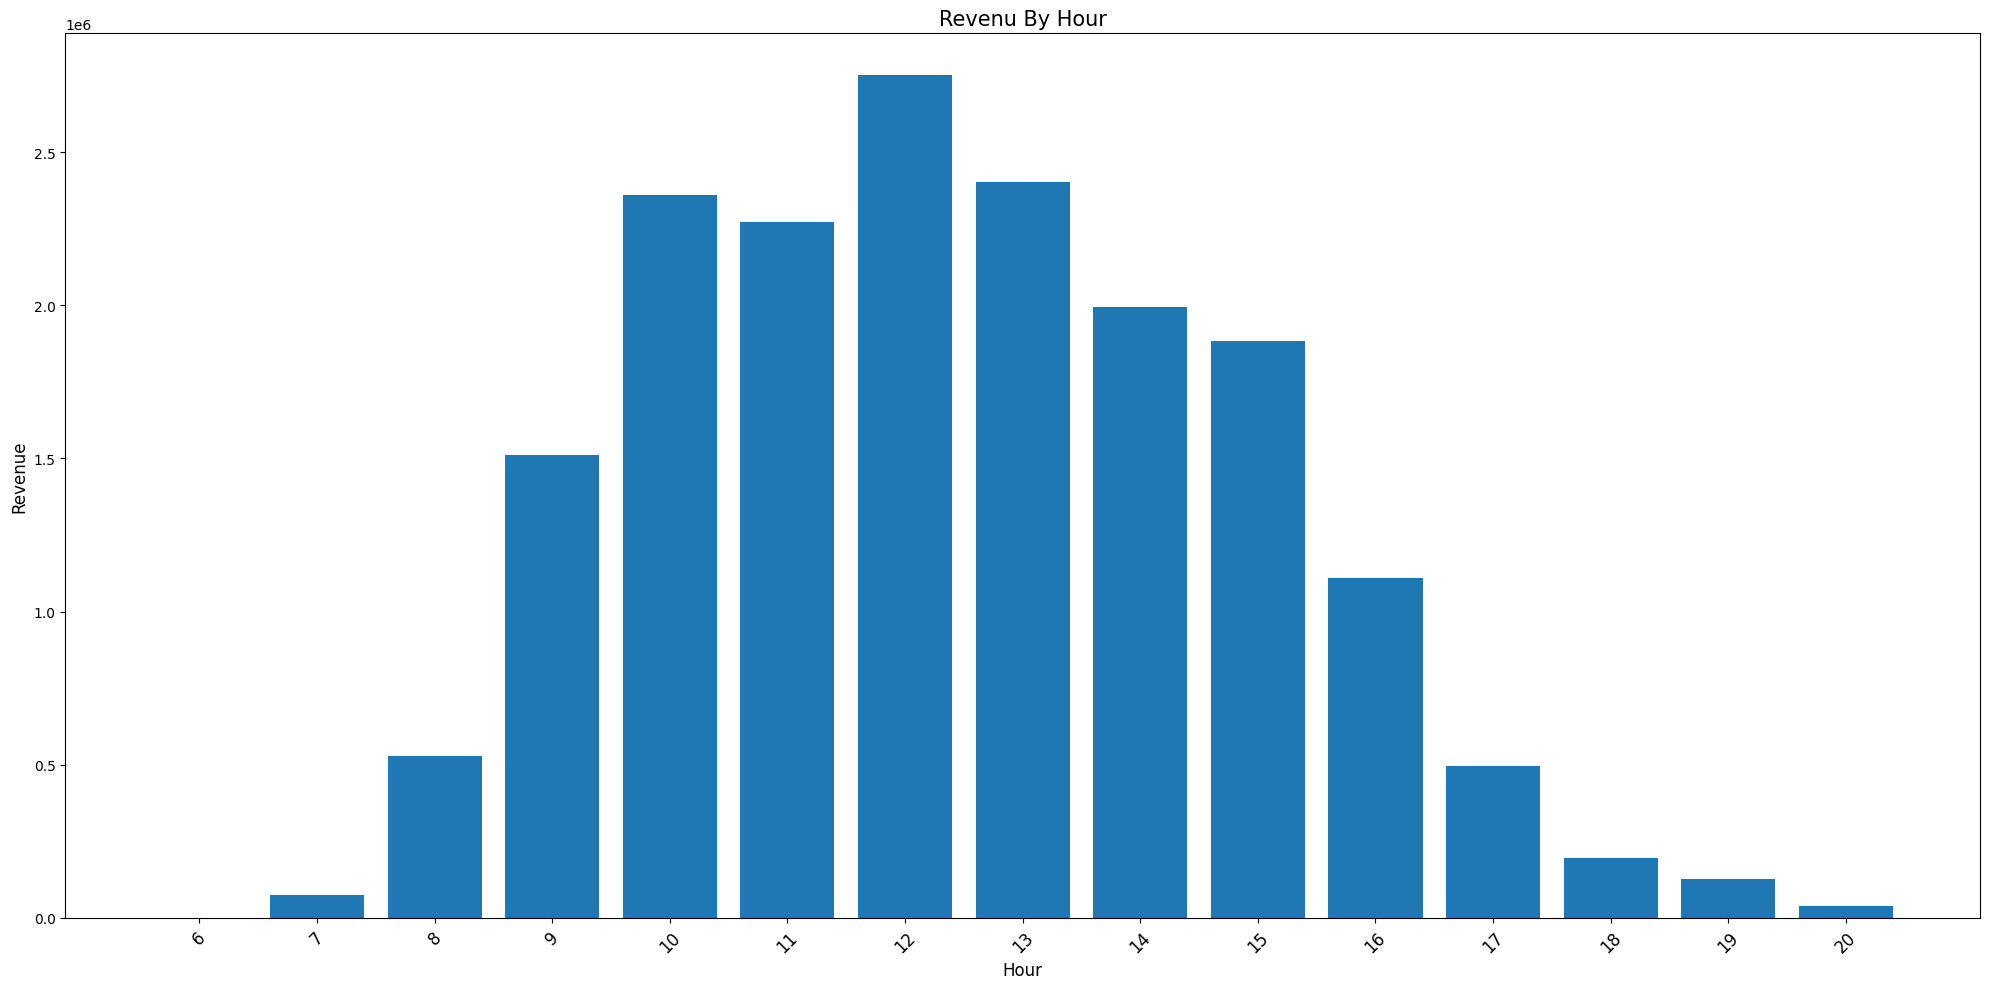

In [42]:
plot_bar(rev_by_hour, 'Hour', 'Revenue', 'Revenu By Hour')